In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable

In [ ]:
# url = '/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset C/'

In [ ]:
# dataset_A = url + 'Dataset A.zip'
# with ZipFile(dataset_A, 'r') as zip:
#   zip.extractall()

In [35]:
data_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset C/training-c.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(24298, 2)


,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7


In [60]:

TRAIN_PATH = '/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset C/training-c'
# os.mkdir(TRAIN_PATH)

# def processImages(folder_name):
#   src = PATH + folder_name + '/'
#   dir_folders = os.listdir(src)
#   for dir_name in dir_folders:
#     file_name = os.path.join(src, dir_name)
#     if os.path.isfile(file_name):
#       shutil.copy(file_name, TRAIN_PATH) 

# processImages('training-c')

In [61]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [62]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(180),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(180),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  24298


In [ ]:
train_data

Experiment: 1

In [58]:
batch_size = 20
num_iters = 20000
input_dim = 180*180 # num_features 
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

65


In [63]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:486
Test dataloader:122


In [64]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [65]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=32400, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [66]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
# gh=1
# for i, (images, labels) in enumerate(train_loader):
#   print(images, labels)
#   gh=gh+1
#   if gh >= 1:
#     break

In [67]:
def epoch_func(num_epochs,train_loader,test_loader):
  iteration_loss = []
  iter = 0
  for epoch in range(num_epochs):
      print('Epoch: ', epoch + 1)
      for i, (images, labels) in enumerate(train_loader):
          images = images.view(-1, 180*180).to(device)
          labels = labels.to(device)
          optimizer.zero_grad()

          outputs = model(images) 

          loss = criterion(outputs, labels)

          loss.backward()

          optimizer.step()

          iter += 1

          if iter % 500 == 0:        
              correct = 0
              total = 0
              for images, labels in test_loader:
                
                  images = images.view(-1, 180*180).to(device)

                  outputs = model(images)

                  _, predicted = torch.max(outputs, 1)

                  total += labels.size(0)

                  if torch.cuda.is_available():
                      correct += (predicted.cpu() == labels.cpu()).sum() 
                  else:
                      correct += (predicted == labels).sum()

              accuracy = 100 * correct.item() / total

              iteration_loss.append(loss.item())
              print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

In [ ]:
epoch_func(num_epochs,train_loader,test_loader)

In [ ]:
# torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/model_base.pkl')

[2.3034706115722656, 2.2987241744995117, 2.301450729370117, 2.3012654781341553, 2.2996795177459717, 2.3097803592681885, 2.294081449508667, 2.2955873012542725, 2.236278533935547, 2.3110880851745605, 2.256373405456543, 2.170766830444336, 1.9849979877471924, 2.2417988777160645, 2.4874377250671387, 2.2344374656677246, 2.187920093536377, 2.214724063873291, 2.1284072399139404, 2.5534698963165283, 2.303806781768799, 2.2291712760925293, 1.8404605388641357, 2.132941246032715, 1.9581797122955322, 2.216296434402466, 1.6052658557891846, 1.7953771352767944, 1.7786626815795898, 1.6191895008087158, 1.91265070438385]


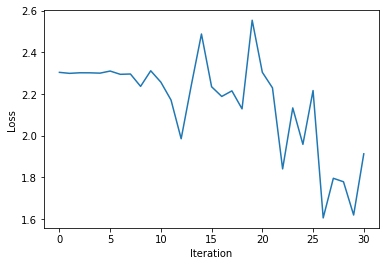

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

In [ ]:
# model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)
# model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/model_base.pkl'))
# model.eval()

Experiment: 2

In [ ]:
batch_size = 40
num_iters = 40000
input_dim = 180*180 # num_features 
num_hidden = 200 # num of hidden nodes
output_dim = 10
learning_rate = 0.01

num_epochs = int(num_iters / (len(train_data) / batch_size))
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)     
epoch_func(num_epochs,train_loader,test_loader)
 

In [ ]:
batch_size = 40
num_iters = 40000
input_dim = 180*180 # num_features 
num_hidden = 200 # num of hidden nodes
output_dim = 10
learning_rate = 0.01

num_epochs = int(num_iters / (len(train_data) / batch_size))
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.Sigmoid()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Sigmoid()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.Sigmoid()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.Sigmoid()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.Sigmoid()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.Sigmoid()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)     
epoch_func(num_epochs,train_loader,test_loader)

65


In [ ]:
batch_size = 20
num_iters = 40000
input_dim = 180*180 # num_features 
num_hidden = 300 # num of hidden nodes
output_dim = 10
learning_rate = 0.05

num_epochs = int(num_iters / (len(train_data) / batch_size))
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.Tanh()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Tanh()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.Tanh()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.Tanh()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.Tanh()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.Tanh()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)     
epoch_func(num_epochs,train_loader,test_loader)

32
Epoch:  1
Iteration: 500. Loss: 2.309987783432007. Accuracy: 10.413665363243465
Epoch:  2
Iteration: 1000. Loss: 2.294351100921631. Accuracy: 10.51656719489607
Iteration: 1500. Loss: 2.2789862155914307. Accuracy: 16.27906976744186
Epoch:  3
Iteration: 2000. Loss: 2.3391919136047363. Accuracy: 11.360362214447417
Iteration: 2500. Loss: 2.3137359619140625. Accuracy: 9.6521918090142
Epoch:  4
Iteration: 3000. Loss: 2.3055806159973145. Accuracy: 13.089112986211154
Iteration: 3500. Loss: 2.324286460876465. Accuracy: 11.010495986828566
Epoch:  5
Iteration: 4000. Loss: 2.281212329864502. Accuracy: 9.487548878370035
Iteration: 4500. Loss: 2.3057291507720947. Accuracy: 12.574603827948138
Epoch:  6
Iteration: 5000. Loss: 2.309100389480591. Accuracy: 11.916032105371476
Iteration: 5500. Loss: 2.295259714126587. Accuracy: 10.290183165260341
Epoch:  7
Iteration: 6000. Loss: 2.307016372680664. Accuracy: 9.672772175344722
Iteration: 6500. Loss: 2.278212308883667. Accuracy: 18.131302737188722
Epoch: 

Experiment: 3

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset_2/verification_train.csv')
print(df2.shape)
df2.head(2)

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset_2/verification_test.csv')
print(df3.shape)
df3.head(2)

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0


In [ ]:
train2 = []
test2 = []
label1 = []
label2 = []

for i in range(10) :
  nary = np.array(df2.iloc[i])
  label1.append(nary[0])
  train2.append(np.delete(nary,0).reshape(28,28))


for i in range(10) :
  nary = np.array(df2.iloc[i])
  label2.append(nary[0])
  test2.append(np.delete(nary,0).reshape(28,28))

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

tensor = torch.Tensor(nary) # transform to torch tensor
my_dataset = TensorDataset(tensor) # create your datset
train_loader2 = DataLoader(my_dataset)

tensor = torch.Tensor(nary) # transform to torch tensor
my_dataset = TensorDataset(tensor) # create your datset
test_loader2 = DataLoader(my_dataset)

In [ ]:
batch_size = 30
num_iters = 40000
input_dim = 180*180 # num_features 
num_hidden = 200 # num of hidden nodes
output_dim = 10
learning_rate = 0.01

num_epochs = int(num_iters / (len(train_data) / batch_size))
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)     
epoch_func(num_epochs,train_loader2,test_loader2)
